# stock market prediction 

# using regression(continues values)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

# preprocessing


In [2]:
# import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset
date_parser = lambda x: pd.to_datetime(x, format='%d-%m-%Y')
stock_dataset = pd.read_csv("NSEIDY.csv", usecols=["Date", "Close"], parse_dates=["Date"],date_parser=date_parser, index_col="Date")

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
stock_dataset['Close'] = imputer.fit_transform(stock_dataset[['Close']])

# Scale "Close" prices using StandardScaler
#scaler = StandardScaler()
#stock_dataset['Close'] = scaler.fit_transform(stock_dataset[['Close']])

# Print the preprocessed dataset
print(stock_dataset.head())





                  Close
Date                   
2020-09-21  11250.54981
2020-09-22  11153.65039
2020-09-23  11131.84961
2020-09-24  10805.54981
2020-09-25  11050.25000


In [3]:
stock_dataset.shape

(744, 1)

In [8]:
stock_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 744 entries, 2020-09-21 to 2023-09-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   744 non-null    float64
dtypes: float64(1)
memory usage: 27.8 KB


In [3]:
print("MIn:",stock_dataset.index.min())
print("Max:",stock_dataset.index.max())

MIn: 2020-09-21 00:00:00
Max: 2023-09-18 00:00:00


# closing price

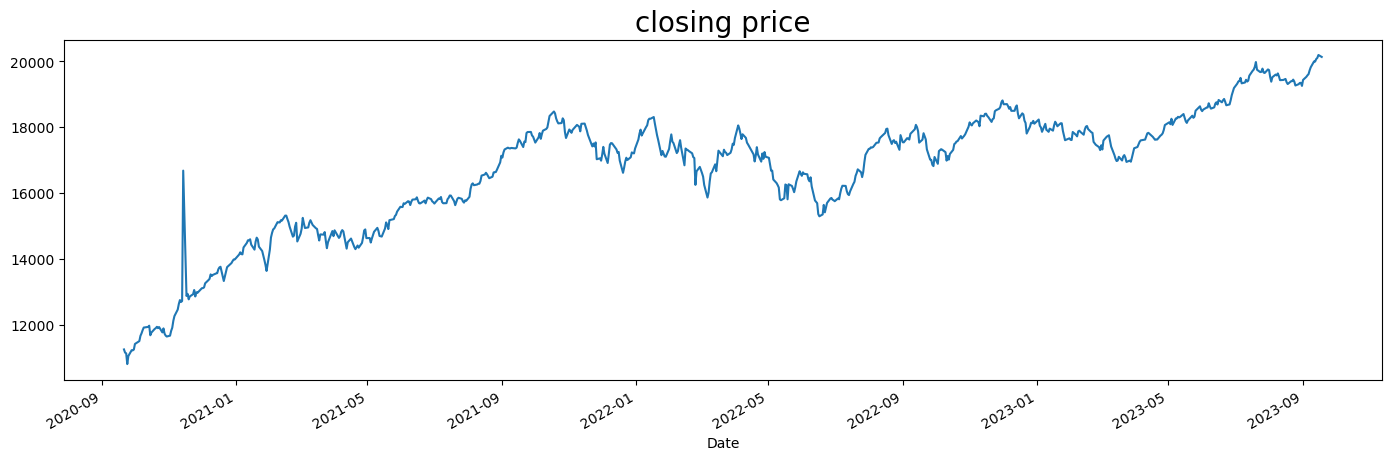

In [4]:
plt.figure(figsize=(17,5))
stock_dataset.Close.plot()
plt.title("closing price",fontsize=20)
plt.show()

# lstm

2/2 [==============================] - 1s 19ms/step
Root Mean Squared Error: 214.7099659454746


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20648\2615893200.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


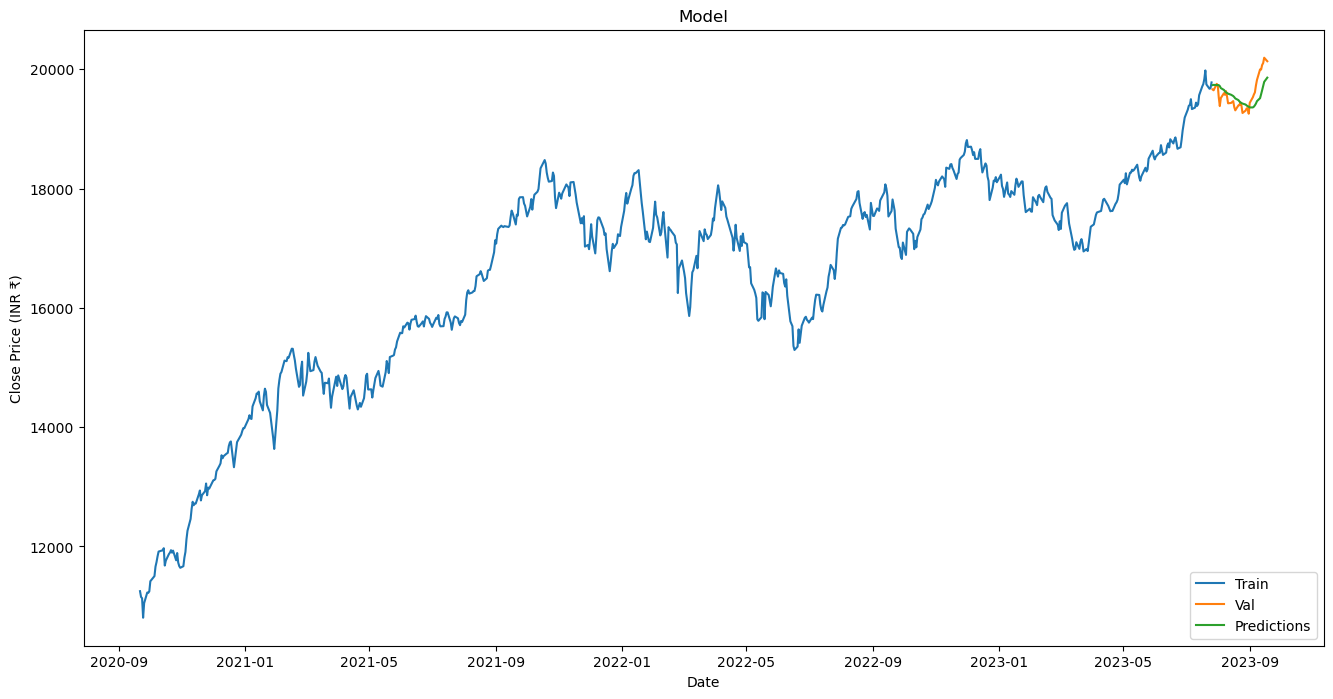

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
date_parser = lambda x: pd.to_datetime(x, format='%d-%m-%Y')
stock_dataset = pd.read_csv("NSEIDY.csv", usecols=["Date", "Close"], parse_dates=["Date"], date_parser=date_parser, index_col="Date")

# Fill missing values with forward fill
stock_dataset['Close'].fillna(method='ffill', inplace=True)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_dataset['Close'].values.reshape(-1, 1))

# Create the training data
train_data_len = int(np.ceil( len(scaled_data) * .95 ))
train_data = scaled_data[0:int(train_data_len), :]
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing dataset
test_data = scaled_data[train_data_len - 60: , :]

# Create x_test and y_test
x_test = []
y_test = stock_dataset.iloc[train_data_len:, :]['Close'].values
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)

# Reshape the data to be 3-dimensional
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the predicted stock prices
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", rmse)

# Plot the data
train = stock_dataset[:train_data_len]
valid = stock_dataset[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price (INR ₹)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


# ANN

2/2 [==============================] - 0s 5ms/step
Root Mean Squared Error: 236.84126574203734


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21940\2834289842.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


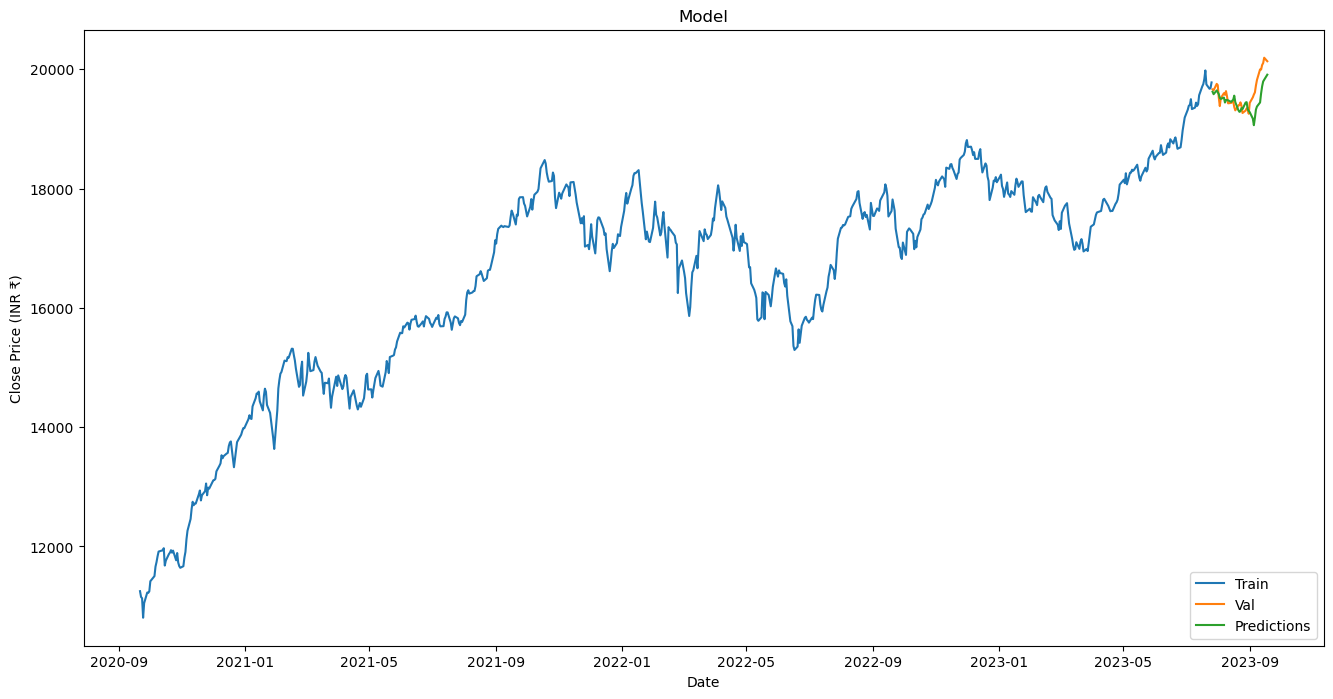

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
date_parser = lambda x: pd.to_datetime(x, format='%d-%m-%Y')
stock_dataset = pd.read_csv("NSEIDY.csv", usecols=["Date", "Close"], parse_dates=["Date"],date_parser=date_parser, index_col="Date")

# Fill missing values with forward fill
stock_dataset['Close'].fillna(method='ffill', inplace=True)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_dataset['Close'].values.reshape(-1, 1))

# Create the training data
train_data_len = int(np.ceil(len(scaled_data) * .95))
train_data = scaled_data[0:int(train_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Build the ANN model
model = Sequential()
model.add(Dense(units=50, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing dataset
test_data = scaled_data[train_data_len - 60:, :]

# Create x_test and y_test
x_test = []
y_test = stock_dataset.iloc[train_data_len:, :]['Close'].values
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)

# Get the predicted stock prices
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", rmse)

# Plot the data
train = stock_dataset[:train_data_len]
valid = stock_dataset[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price (INR ₹)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


# Randome forest

Root Mean Squared Error: 311.49996972248033


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21940\3174425168.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


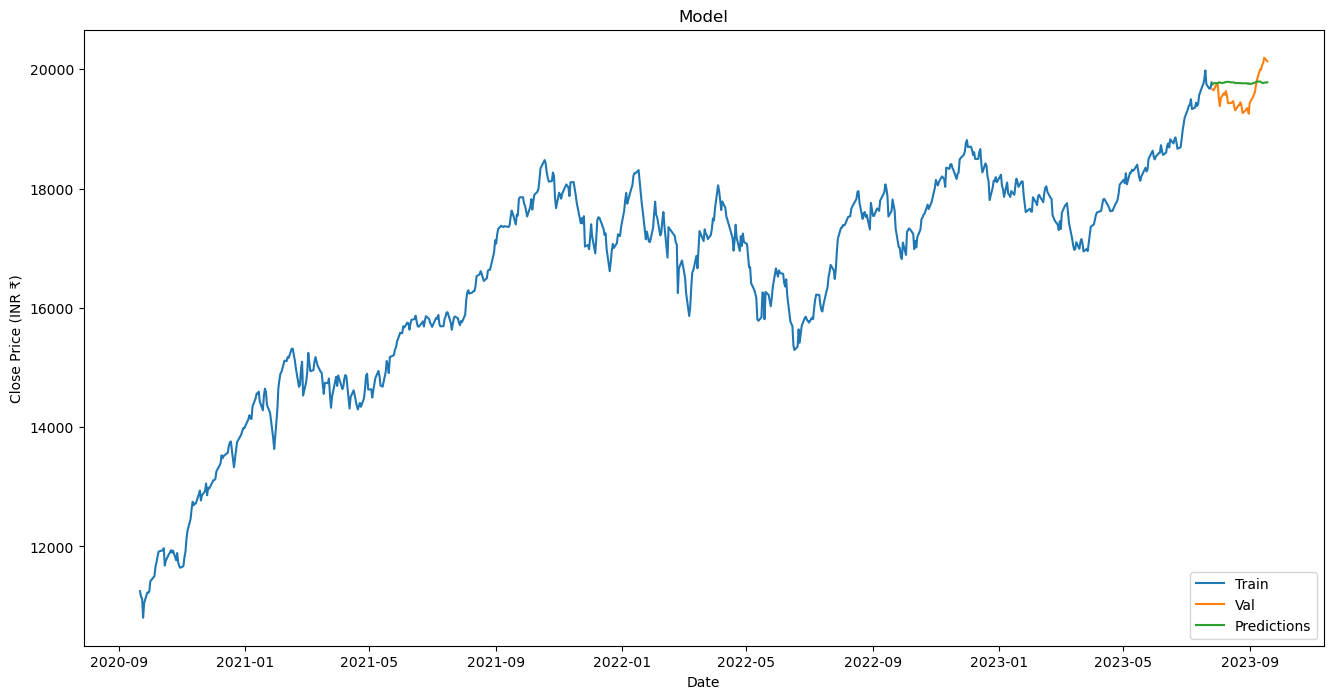

In [13]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
date_parser = lambda x: pd.to_datetime(x, format='%d-%m-%Y')
stock_dataset = pd.read_csv("NSEIDY.csv", usecols=["Date", "Close"], parse_dates=["Date"],date_parser=date_parser, index_col="Date")

# Fill missing values with forward fill
stock_dataset['Close'].fillna(method='ffill', inplace=True)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_dataset['Close'].values.reshape(-1, 1))

# Create the training data
train_data_len = int(np.ceil(len(scaled_data) * .95))
train_data = scaled_data[0:int(train_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Build the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(x_train, y_train)

# Create the testing dataset
test_data = scaled_data[train_data_len - 60:, :]

# Create x_test and y_test
x_test = []
y_test = stock_dataset.iloc[train_data_len:, :]['Close'].values
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)

# Get the predicted stock prices
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", rmse)

# Plot the data
train = stock_dataset[:train_data_len]
valid = stock_dataset[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price (INR ₹)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


# GradientBoosting

Root Mean Squared Error: 313.41261863665454


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21940\1619490482.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


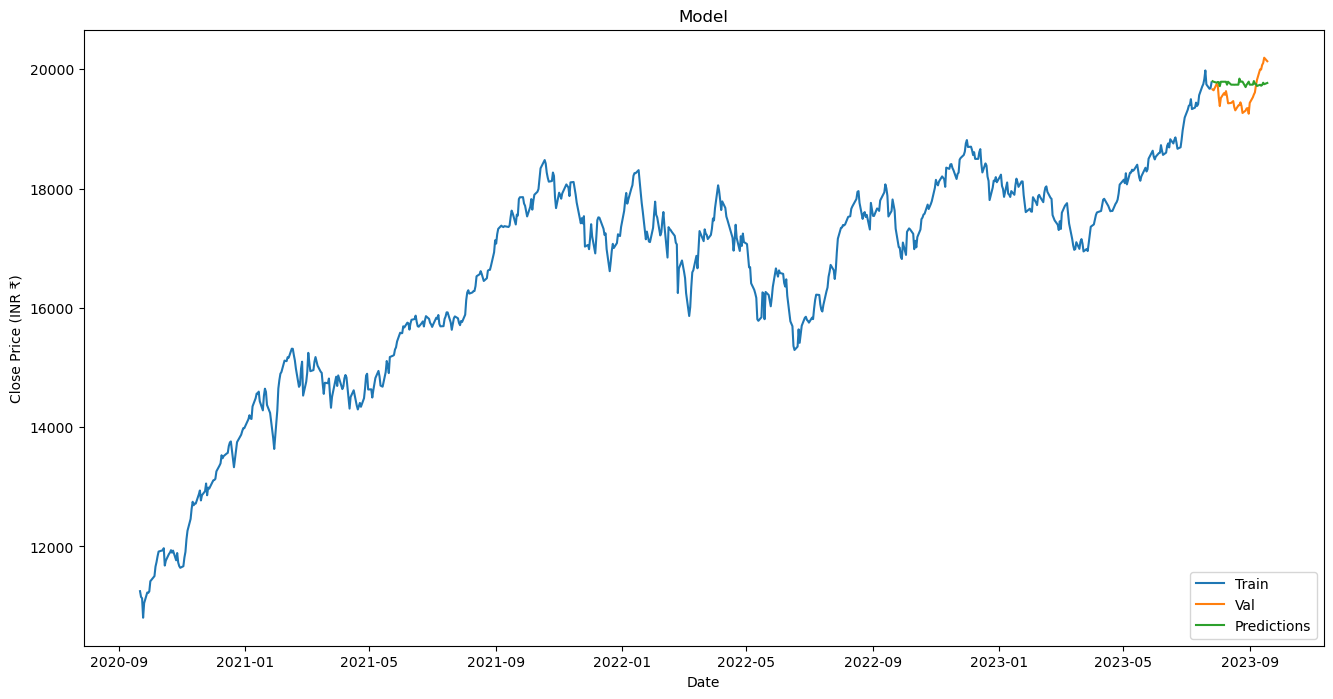

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# Load the dataset
date_parser = lambda x: pd.to_datetime(x, format='%d-%m-%Y')
stock_dataset = pd.read_csv("NSEIDY.csv", usecols=["Date", "Close"], parse_dates=["Date"],date_parser=date_parser, index_col="Date")

# Fill missing values with forward fill
stock_dataset['Close'].fillna(method='ffill', inplace=True)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_dataset['Close'].values.reshape(-1, 1))

# Create the training data
train_data_len = int(np.ceil(len(scaled_data) * .95))
train_data = scaled_data[0:int(train_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Build the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(x_train, y_train)

# Create the testing dataset
test_data = scaled_data[train_data_len - 60:, :]

# Create x_test and y_test
x_test = []
y_test = stock_dataset.iloc[train_data_len:, :]['Close'].values
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)

# Get the predicted stock prices
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", rmse)

# Plot the data
train = stock_dataset[:train_data_len]
valid = stock_dataset[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price (INR ₹)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


# Arima

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Root Mean Squared Error: 309.0199737675321


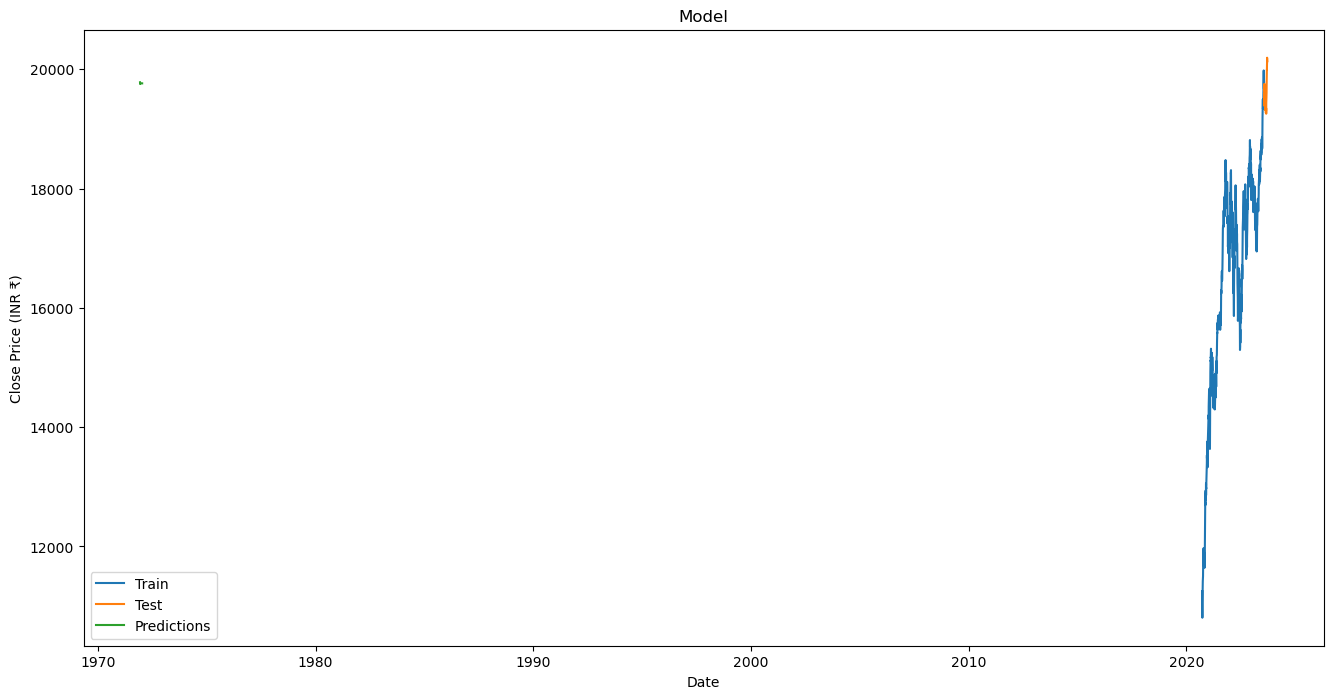

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
date_parser = lambda x: pd.to_datetime(x, format='%d-%m-%Y')
stock_dataset = pd.read_csv("NSEIDY.csv", usecols=["Date", "Close"], parse_dates=["Date"],date_parser=date_parser, index_col="Date")

# Fill missing values with forward fill
stock_dataset['Close'].fillna(method='ffill', inplace=True)

# Create the training data
train_data_len = int(np.ceil(len(stock_dataset) * .95))
train_data = stock_dataset.iloc[:train_data_len, :]
test_data = stock_dataset.iloc[train_data_len:, :]

# Build the ARIMA model
order = (5, 1, 0)  # ARIMA parameters (p, d, q)
model = ARIMA(train_data['Close'], order=order)

# Fit the ARIMA model
model_fit = model.fit()

# Get the predicted stock prices
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Close'], predictions))
print("Root Mean Squared Error:", rmse)

# Plot the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price (INR ₹)')
plt.plot(train_data['Close'], label='Train')
plt.plot(test_data['Close'], label='Test')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()


# Moving average

Root Mean Squared Error: 1056.8135899117847


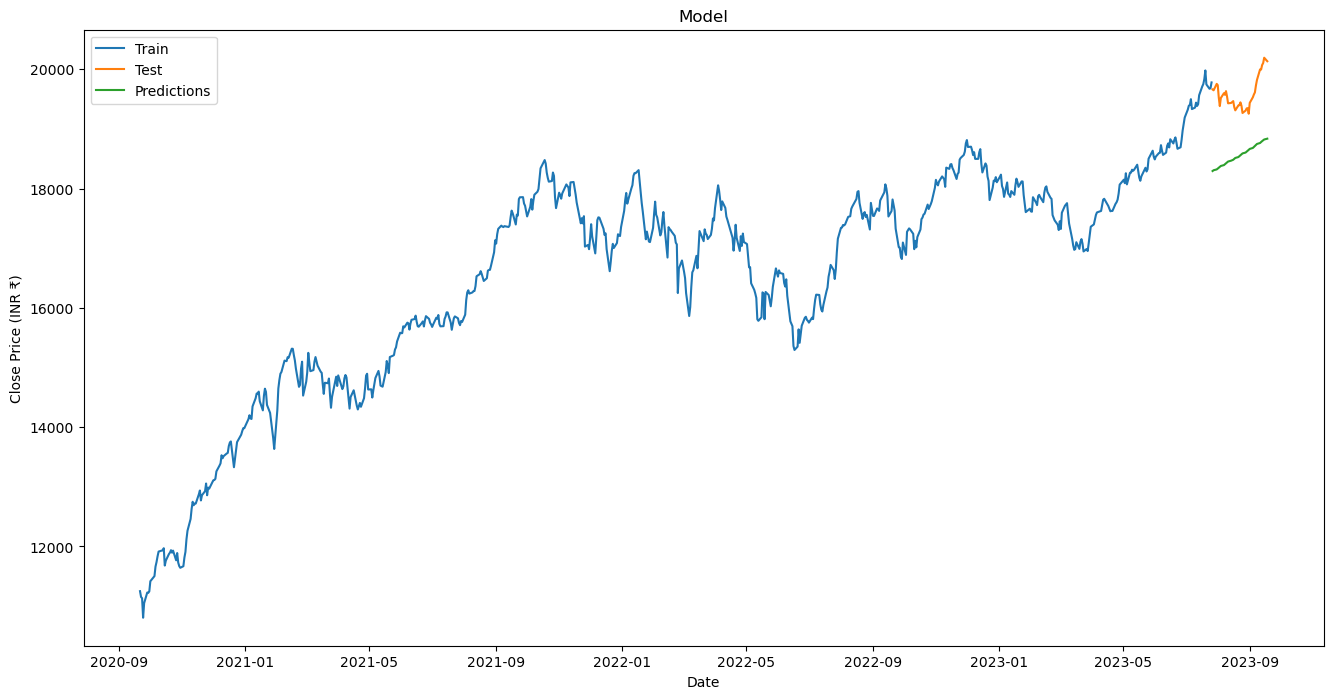

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the dataset
date_parser = lambda x: pd.to_datetime(x, format='%d-%m-%Y')
stock_dataset = pd.read_csv("NSEIDY.csv", usecols=["Date", "Close"], parse_dates=["Date"],date_parser=date_parser, index_col="Date")

# Fill missing values with forward fill
stock_dataset['Close'].fillna(method='ffill', inplace=True)

# Create the training and testing data
train_data_len = int(np.ceil(len(stock_dataset) * .95))
train_data = stock_dataset.iloc[:train_data_len, :]
test_data = stock_dataset.iloc[train_data_len:, :]

# Calculate moving average
window_size = 60
moving_average = train_data['Close'].rolling(window=window_size).mean()

# Remove NaN values from moving average
moving_average = moving_average.dropna()

# Get the last 60 days of training data
last_60_days = train_data['Close'][-60:].values

# Predict stock prices using the moving average
predictions = []
for i in range(len(test_data)):
    predicted_value = moving_average[-1 * (len(test_data) - i):].mean()
    predictions.append(predicted_value)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Close'], predictions))
print("Root Mean Squared Error:", rmse)

# Plot the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price (INR ₹)')
plt.plot(train_data['Close'], label='Train')
plt.plot(test_data['Close'], label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.legend()
plt.show()


# Bagging

Root Mean Squared Error: 1336.7378544050048


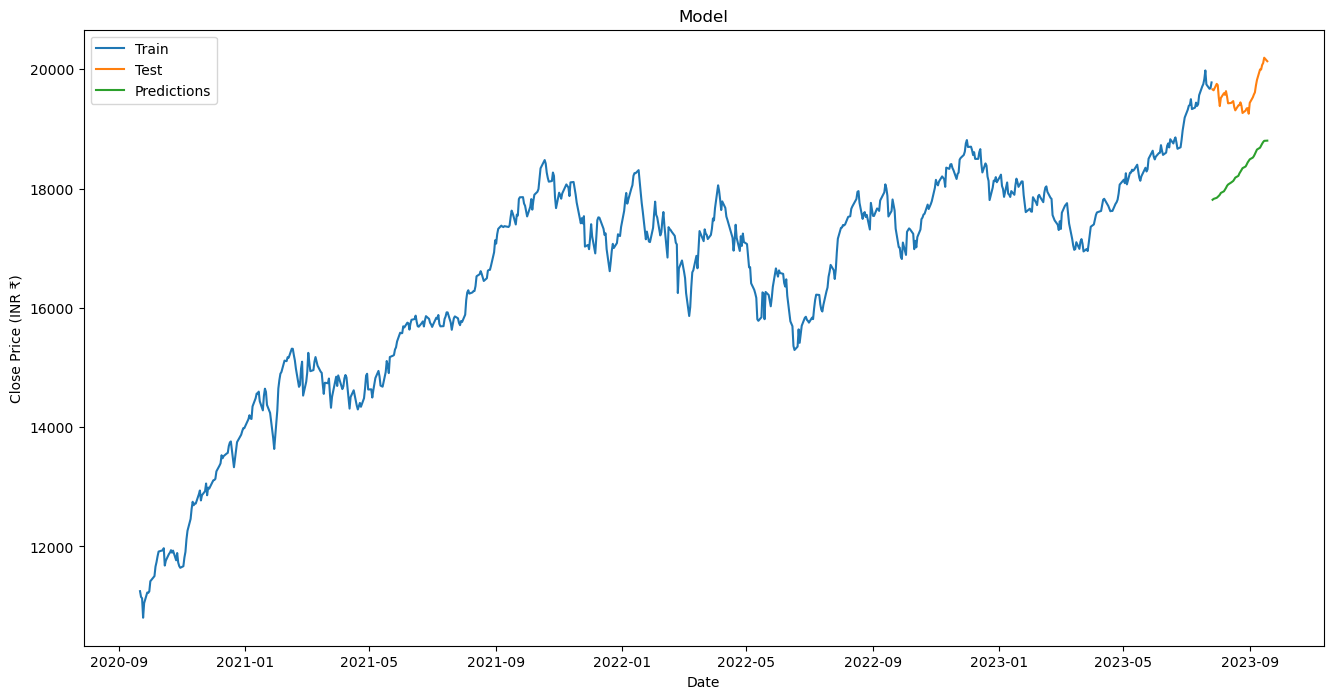

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor

# Load the dataset
date_parser = lambda x: pd.to_datetime(x, format='%d-%m-%Y')
stock_dataset = pd.read_csv("NSEIDY.csv", usecols=["Date", "Close"], parse_dates=["Date"],date_parser=date_parser, index_col="Date")

# Fill missing values with forward fill
stock_dataset['Close'].fillna(method='ffill', inplace=True)

# Create the training and testing data
train_data_len = int(np.ceil(len(stock_dataset) * .95))
train_data = stock_dataset.iloc[:train_data_len, :]
test_data = stock_dataset.iloc[train_data_len:, :]

# Calculate moving average
window_size = 60
moving_average = train_data['Close'].rolling(window=window_size).mean()

# Remove NaN values from moving average
moving_average = moving_average.dropna()

# Get the last 60 days of training data
last_60_days = train_data['Close'][-60:].values

# Build the Bagging Regressor model
model = BaggingRegressor(n_estimators=100, random_state=42)

# Prepare the training data
x_train = []
y_train = []
for i in range(60, len(moving_average)):
    x_train.append(moving_average[i-60:i])
    y_train.append(moving_average[i])
x_train, y_train = np.array(x_train), np.array(y_train)

# Train the model
model.fit(x_train, y_train)

# Prepare the testing data
x_test = []
for i in range(len(test_data)):
    x_test.append(moving_average[-1 * (len(test_data) - i) - 60:-1 * (len(test_data) - i)])
x_test = np.array(x_test)

# Get the predicted stock prices
predictions = model.predict(x_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Close'], predictions))
print("Root Mean Squared Error:", rmse)

# Plot the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price (INR ₹)')
plt.plot(train_data['Close'], label='Train')
plt.plot(test_data['Close'], label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.legend()
plt.show()


# linear Regression

Root Mean Squared Error: 1332.109640590244


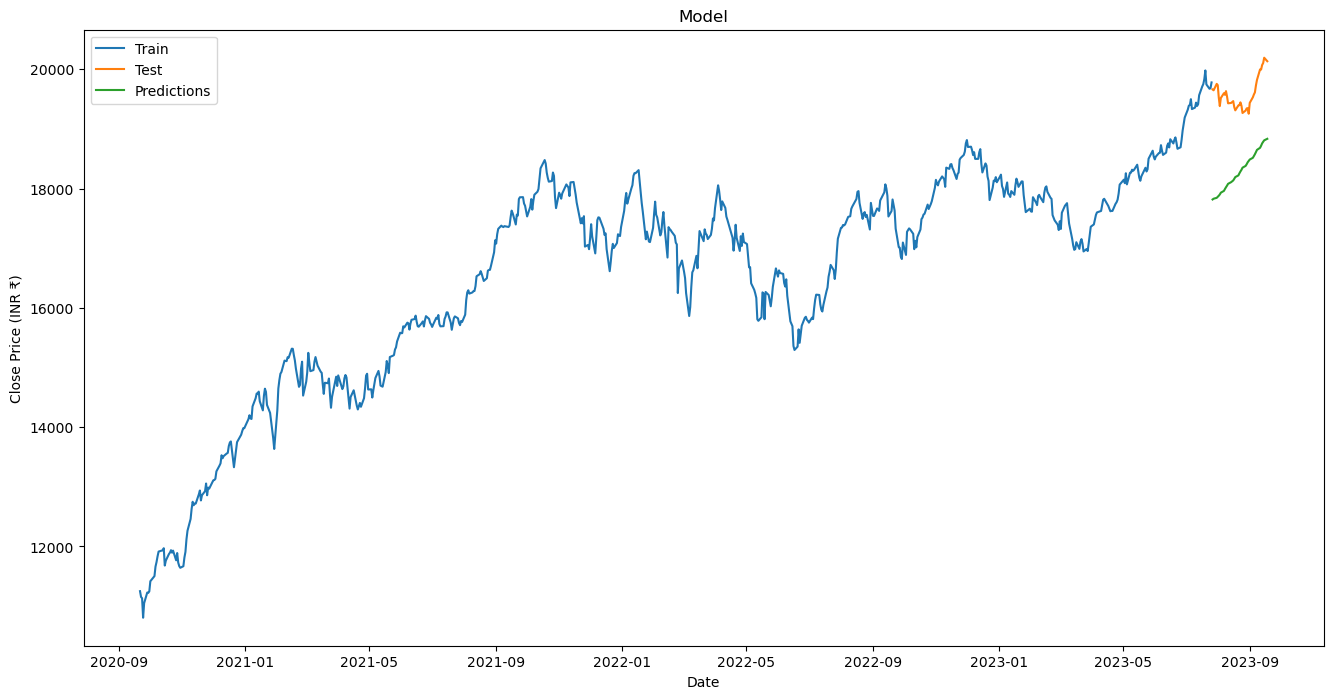

In [7]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Load the dataset
date_parser = lambda x: pd.to_datetime(x, format='%d-%m-%Y')
stock_dataset = pd.read_csv("NSEIDY.csv", usecols=["Date", "Close"], parse_dates=["Date"],date_parser=date_parser, index_col="Date")

# Fill missing values with forward fill
stock_dataset['Close'].fillna(method='ffill', inplace=True)

# Create the training and testing data
train_data_len = int(np.ceil(len(stock_dataset) * .95))
train_data = stock_dataset.iloc[:train_data_len, :]
test_data = stock_dataset.iloc[train_data_len:, :]

# Calculate moving average
window_size = 60
moving_average = train_data['Close'].rolling(window=window_size).mean()

# Remove NaN values from moving average
moving_average = moving_average.dropna()

# Get the last 60 days of training data
last_60_days = train_data['Close'][-60:].values

# Build the Linear Regression model
model = LinearRegression()

# Prepare the training data
x_train = []
y_train = []
for i in range(60, len(moving_average)):
    x_train.append(moving_average[i-60:i])
    y_train.append(moving_average[i])
x_train, y_train = np.array(x_train), np.array(y_train)

# Train the model
model.fit(x_train, y_train)

# Prepare the testing data
x_test = []
for i in range(len(test_data)):
    x_test.append(moving_average[-1 * (len(test_data) - i) - 60:-1 * (len(test_data) - i)])
x_test = np.array(x_test)

# Get the predicted stock prices
predictions = model.predict(x_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Close'], predictions))
print("Root Mean Squared Error:", rmse)

# Plot the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price (INR ₹)')
plt.plot(train_data['Close'], label='Train')
plt.plot(test_data['Close'], label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.legend()
plt.show()


# DNN

# lstm future

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the dataset
date_parser = lambda x: pd.to_datetime(x, format='%d-%m-%Y')
stock_dataset = pd.read_csv("NSEIDY.csv", usecols=["Date", "Close"], parse_dates=["Date"], date_parser=date_parser, index_col="Date")

# Fill missing values with forward fill
stock_dataset['Close'].fillna(method='ffill', inplace=True)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_dataset['Close'].values.reshape(-1, 1))

# Create the training data
train_data_len = int(np.ceil(len(scaled_data) * .95))
train_data = scaled_data[0:int(train_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

# Create the testing dataset
test_data = scaled_data[train_data_len - 60:, :]

# Create x_test
x_test = []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)

# Reshape the data to be 3-dimensional
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Function to generate future predictions
def generate_future_predictions(model, x_test, num_predictions):
    predictions = []

    for _ in range(num_predictions):
        prediction = model.predict(x_test[-1].reshape(1, 60, 1))[0, 0]
        x_test = np.roll(x_test, shift=-1, axis=1)
        x_test[0, -1, 0] = prediction
        predictions.append(prediction)

    return predictions

# Predict future stock prices for the next 3 months (90 days)
num_days = 90
future_predictions = generate_future_predictions(model, x_test, num_days)

# Inverse transform the future predictions to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Print the future predictions
print(future_predictions)

# Plotting the future predicted stock prices
last_date = stock_dataset.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=num_days)
plt.figure(figsize=(12, 6))
plt.plot(future_dates, future_predictions, label='Predicted Stock Prices', linestyle='--', marker='o', color='blue')
plt.title('Predicted Stock Prices for the Next 90 Days (LSTM Model)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/10
647/647 [==============================] - 30s 36ms/step - loss: 0.0054
Epoch 2/10
647/647 [==============================] - 23s 36ms/step - loss: 0.0015
Epoch 3/10
175/647 [=======>......................] - ETA: 17s - loss: 0.0015

# Ann

Epoch 1/10
647/647 [==============================] - 2s 2ms/step - loss: 0.0054
Epoch 2/10
647/647 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 3/10
647/647 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 4/10
647/647 [==============================] - 1s 2ms/step - loss: 0.0019
Epoch 5/10
647/647 [==============================] - 1s 2ms/step - loss: 0.0014
Epoch 6/10
647/647 [==============================] - 1s 2ms/step - loss: 0.0014
Epoch 7/10
647/647 [==============================] - 1s 2ms/step - loss: 0.0017
Epoch 8/10
647/647 [==============================] - 1s 2ms/step - loss: 0.0014
Epoch 9/10
647/647 [==============================] - 1s 2ms/step - loss: 0.0013
Epoch 10/10
1/1 [==============================] - 0s 20ms/step


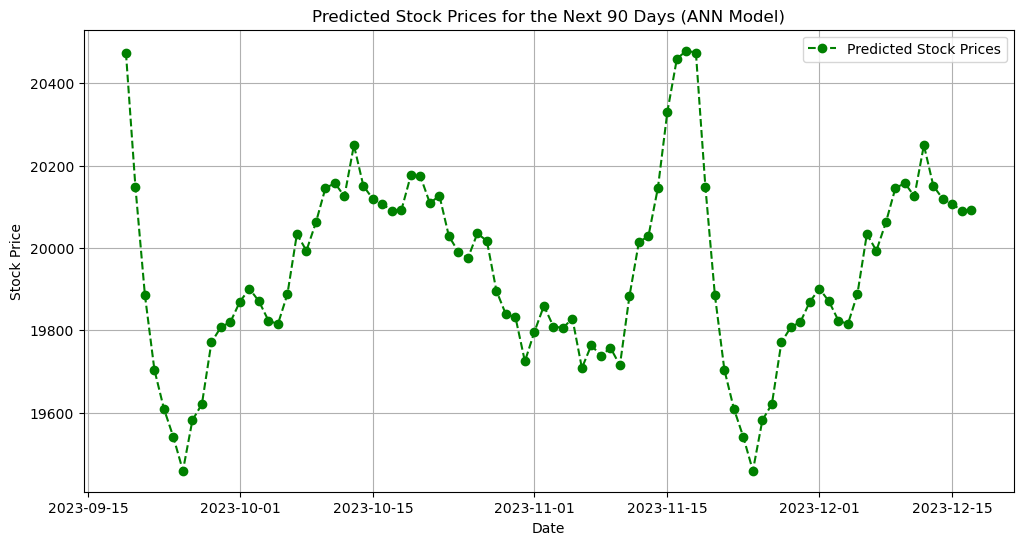

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
date_parser = lambda x: pd.to_datetime(x, format='%d-%m-%Y')
stock_dataset = pd.read_csv("NSEIDY.csv", usecols=["Date", "Close"], parse_dates=["Date"], date_parser=date_parser, index_col="Date")

# Fill missing values with forward fill
stock_dataset['Close'].fillna(method='ffill', inplace=True)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_dataset['Close'].values.reshape(-1, 1))

# Create the training data
train_data_len = int(np.ceil(len(scaled_data) * .95))
train_data = scaled_data[0:int(train_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Build the ANN model
model = Sequential()
model.add(Dense(units=50, activation='relu', input_dim=60))  # Input shape matches the window size (60)
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

# Create the testing dataset
test_data = scaled_data[train_data_len - 60:, :]

# Create x_test
x_test = []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)

# Function to generate future predictions
def generate_future_predictions(model, x_test, num_predictions):
    predictions = []

    for _ in range(num_predictions):
        prediction = model.predict(x_test[-1].reshape(1, 60))
        x_test = np.roll(x_test, shift=-1, axis=1)
        x_test[0, -1] = prediction
        predictions.append(prediction[0, 0])

    return predictions

# Predict future stock prices for the next 3 months (90 days)
num_days = 90
future_predictions = generate_future_predictions(model, x_test, num_days)

# Inverse transform the future predictions to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plotting the future predicted stock prices
future_dates = pd.date_range(start=stock_dataset.index[-1] + pd.Timedelta(days=1), periods=num_days)
plt.figure(figsize=(12, 6))
plt.plot(future_dates, future_predictions, label='Predicted Stock Prices', linestyle='--', marker='o', color='green')
plt.title('Predicted Stock Prices for the Next 90 Days (ANN Model)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


# randome forest

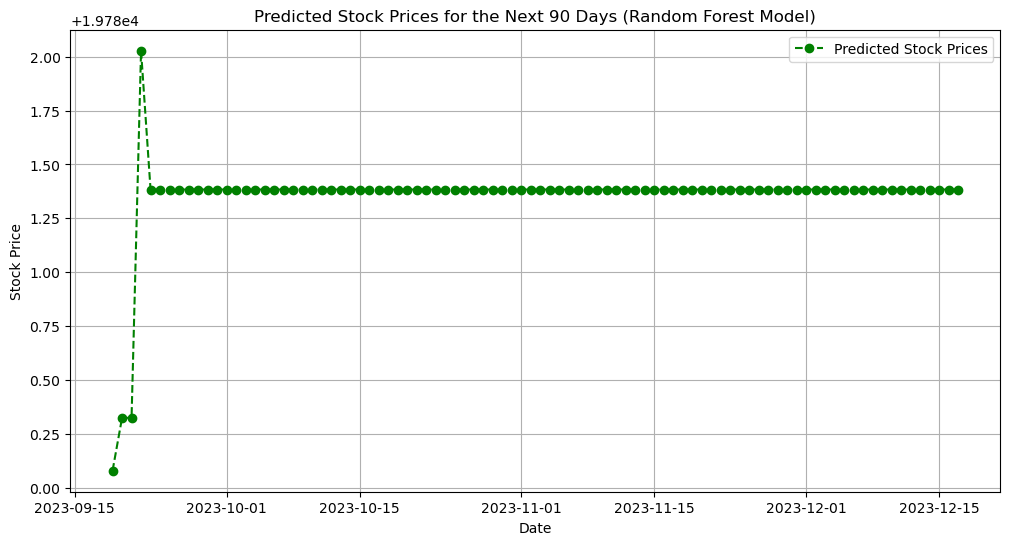

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
date_parser = lambda x: pd.to_datetime(x, format='%d-%m-%Y')
stock_dataset = pd.read_csv("NSEIDY.csv", usecols=["Date", "Close"], parse_dates=["Date"], date_parser=date_parser, index_col="Date")

# Fill missing values with forward fill
stock_dataset['Close'].fillna(method='ffill', inplace=True)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_dataset['Close'].values.reshape(-1, 1))

# Create the training data
train_data_len = int(np.ceil(len(scaled_data) * .95))
train_data = scaled_data[0:int(train_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Create the testing dataset
test_data = scaled_data[train_data_len - 60:, :]
x_test = []
y_test = []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

# Build the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators

# Train the model
model.fit(x_train, y_train)

# Predict future stock prices for the next 3 months (90 days)
num_days = 90
future_predictions = []
x_future = x_test[-1].reshape(1, -1)  # Use the last window of data as input for prediction

for _ in range(num_days):
    prediction = model.predict(x_future)
    future_predictions.append(prediction[0])
    x_future = np.roll(x_future, shift=-1)
    x_future[0, -1] = prediction

# Inverse transform the future predictions to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Print the future predictions


# Plotting the future predicted stock prices
future_dates = pd.date_range(start=stock_dataset.index[-1] + pd.Timedelta(days=1), periods=num_days)
plt.figure(figsize=(12, 6))
plt.plot(future_dates, future_predictions, label='Predicted Stock Prices', linestyle='--', marker='o', color='green')
plt.title('Predicted Stock Prices for the Next 90 Days (Random Forest Model)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


# GradientBoosting

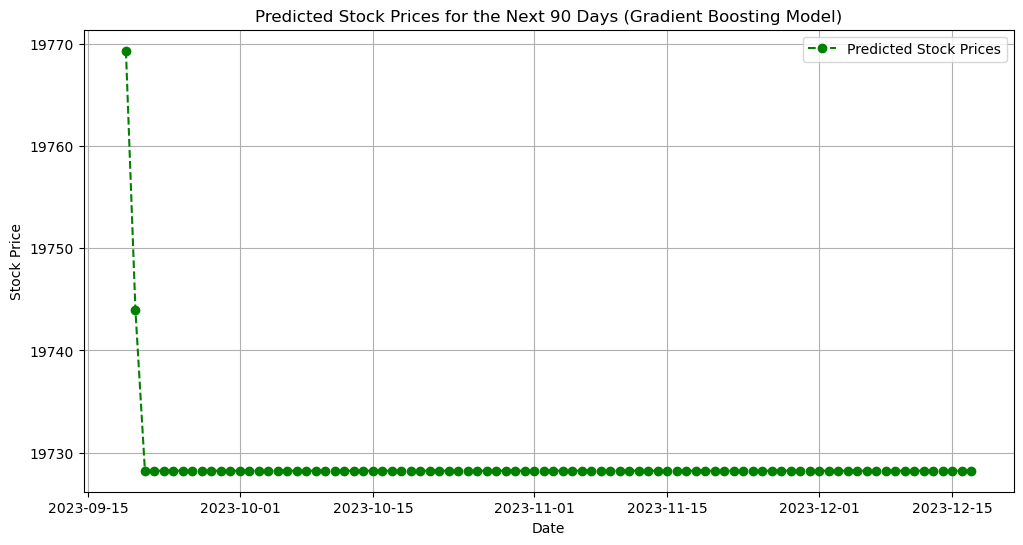

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor

# Load the dataset
date_parser = lambda x: pd.to_datetime(x, format='%d-%m-%Y')
stock_dataset = pd.read_csv("NSEIDY.csv", usecols=["Date", "Close"], parse_dates=["Date"], date_parser=date_parser, index_col="Date")

# Fill missing values with forward fill
stock_dataset['Close'].fillna(method='ffill', inplace=True)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_dataset['Close'].values.reshape(-1, 1))

# Create the training data
train_data_len = int(np.ceil(len(scaled_data) * .95))
train_data = scaled_data[0:int(train_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Create the testing dataset
test_data = scaled_data[train_data_len - 60:, :]
x_test = []
y_test = []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

# Build the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators

# Train the model
model.fit(x_train, y_train)

# Predict future stock prices for the next 3 months (90 days)
num_days = 90
future_predictions = []
x_future = x_test[-1].reshape(1, -1)  # Use the last window of data as input for prediction

for _ in range(num_days):
    prediction = model.predict(x_future)
    future_predictions.append(prediction[0])
    x_future = np.roll(x_future, shift=-1)
    x_future[0, -1] = prediction

# Inverse transform the future predictions to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Print the future predictions
#print(future_predictions)

# Plotting the future predicted stock prices
future_dates = pd.date_range(start=stock_dataset.index[-1] + pd.Timedelta(days=1), periods=num_days)
plt.figure(figsize=(12, 6))
plt.plot(future_dates, future_predictions, label='Predicted Stock Prices', linestyle='--', marker='o', color='green')
plt.title('Predicted Stock Prices for the Next 90 Days (Gradient Boosting Model)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


# arima

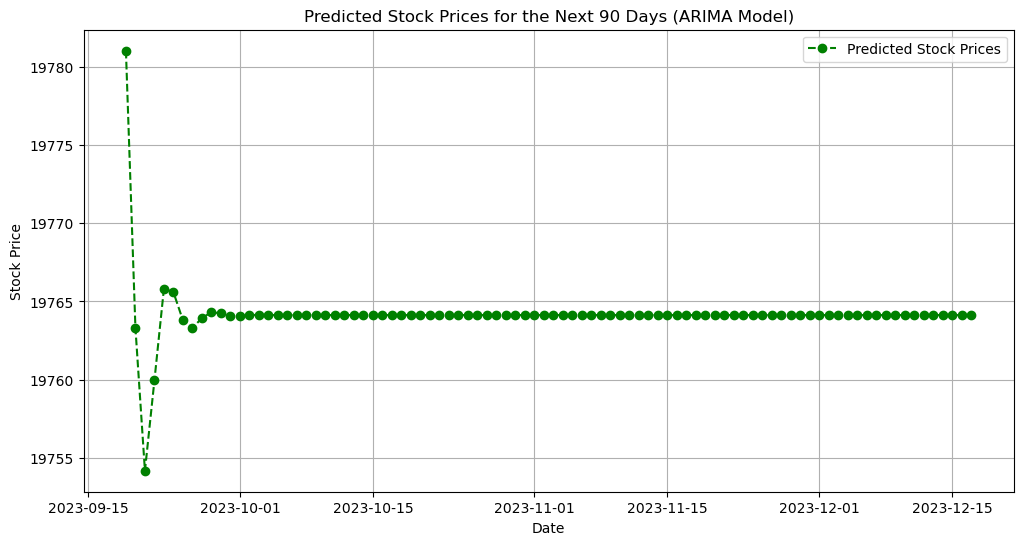

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

# Load the dataset
date_parser = lambda x: pd.to_datetime(x, format='%d-%m-%Y')
stock_dataset = pd.read_csv("NSEIDY.csv", usecols=["Date", "Close"], parse_dates=["Date"], date_parser=date_parser, index_col="Date")

# Fill missing values with forward fill
stock_dataset['Close'].fillna(method='ffill', inplace=True)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_dataset['Close'].values.reshape(-1, 1))

# Create the training data
train_data_len = int(np.ceil(len(scaled_data) * .95))
train_data = scaled_data[0:int(train_data_len), :]

# Build the ARIMA model
order = (5, 1, 0)  # You can adjust the order of ARIMA (p, d, q) as needed
model = sm.tsa.ARIMA(train_data, order=order)
model_fit = model.fit()

# Predict future stock prices for the next 3 months (90 days)
num_days = 90
forecast = model_fit.forecast(steps=num_days)

# Inverse transform the future predictions to the original scale
future_predictions = scaler.inverse_transform(forecast.reshape(-1, 1))

# Print the future predictions
#print(future_predictions)

# Plotting the future predicted stock prices
last_date = stock_dataset.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=num_days)
plt.figure(figsize=(12, 6))
plt.plot(future_dates, future_predictions, label='Predicted Stock Prices', linestyle='--', marker='o', color='green')
plt.title('Predicted Stock Prices for the Next 90 Days (ARIMA Model)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


# moving average

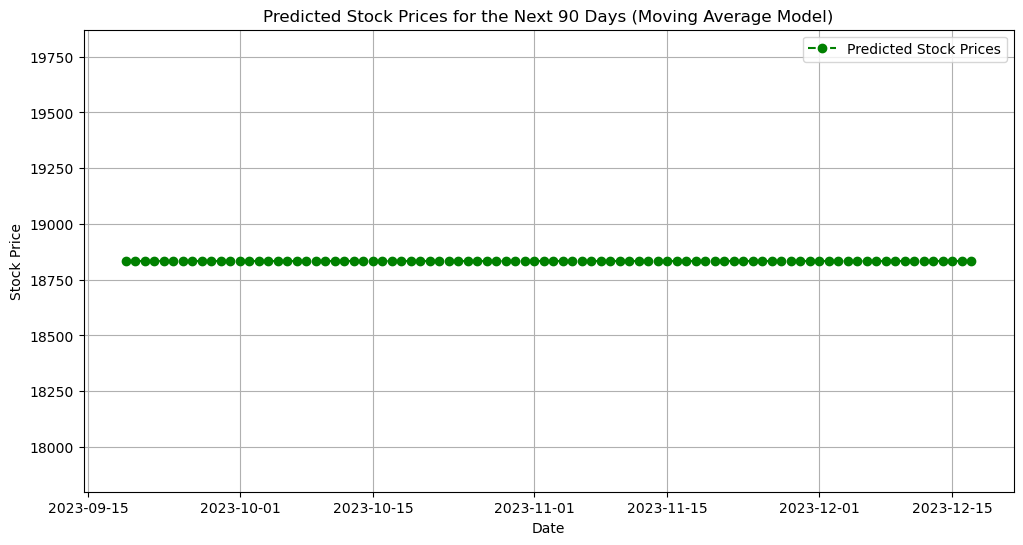

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
date_parser = lambda x: pd.to_datetime(x, format='%d-%m-%Y')
stock_dataset = pd.read_csv("NSEIDY.csv", usecols=["Date", "Close"], parse_dates=["Date"], date_parser=date_parser, index_col="Date")

# Fill missing values with forward fill
stock_dataset['Close'].fillna(method='ffill', inplace=True)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_dataset['Close'].values.reshape(-1, 1))

# Create the training data
train_data_len = int(np.ceil(len(scaled_data) * .95))
train_data = scaled_data[0:int(train_data_len), :]

# Calculate the moving average on historical data
window_size = 60  # You can adjust the window size as needed
moving_average = np.convolve(train_data[:, 0], np.ones(window_size)/window_size, mode='valid')

# Predict future stock prices using the last moving average value
num_days = 90
future_predictions = []

for _ in range(num_days):
    prediction = moving_average[-1]  # Use the last moving average value as the prediction
    future_predictions.append(prediction)
    # Update the moving average by appending the prediction and removing the oldest value
    moving_average = np.append(moving_average, prediction)
    moving_average = moving_average[1:]

# Inverse transform the future predictions to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Print the future predictions
#print(future_predictions)

# Plotting the future predicted stock prices
last_date = stock_dataset.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=num_days)
plt.figure(figsize=(12, 6))
plt.plot(future_dates, future_predictions, label='Predicted Stock Prices', linestyle='--', marker='o', color='green')
plt.title('Predicted Stock Prices for the Next 90 Days (Moving Average Model)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


# linear regression

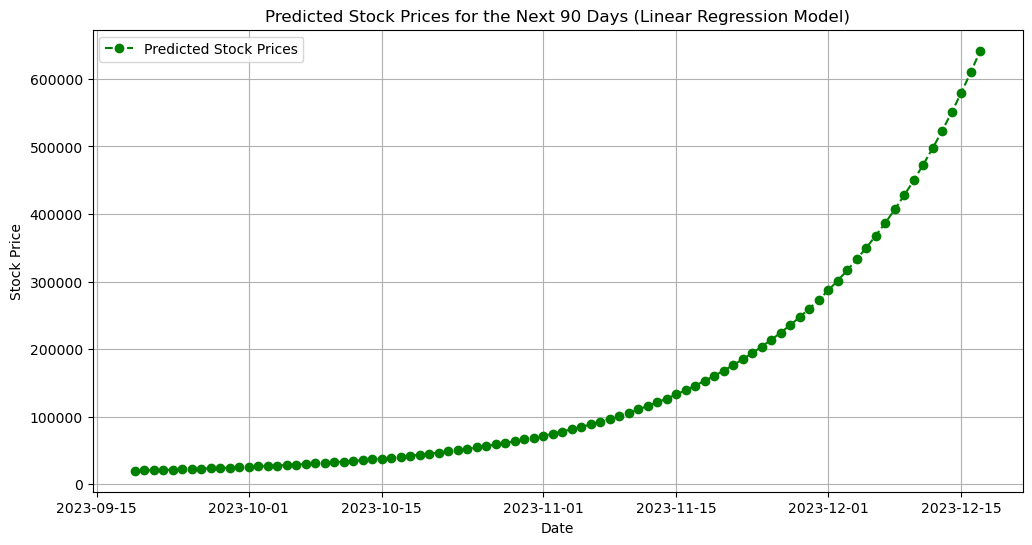

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# Load the dataset
date_parser = lambda x: pd.to_datetime(x, format='%d-%m-%Y')
stock_dataset = pd.read_csv("NSEIDY.csv", usecols=["Date", "Close"], parse_dates=["Date"], date_parser=date_parser, index_col="Date")

# Fill missing values with forward fill
stock_dataset['Close'].fillna(method='ffill', inplace=True)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_dataset['Close'].values.reshape(-1, 1))

# Create the training data
train_data_len = int(np.ceil(len(scaled_data) * .95))
train_data = scaled_data[0:int(train_data_len), :]

# Prepare the training features (X) and target (y)
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future stock prices for the next 3 months (90 days)
num_days = 90
future_predictions = []

for _ in range(num_days):
    prediction = model.predict(X_train[-1].reshape(1, -1))[0]
    future_predictions.append(prediction)
    # Update X_train by shifting it to the right and appending the new prediction
    X_train = np.roll(X_train, shift=-1, axis=0)
    X_train[-1, -1] = prediction

# Inverse transform the future predictions to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Print the future predictions
#print(future_predictions)

# Plotting the future predicted stock prices
last_date = stock_dataset.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=num_days)
plt.figure(figsize=(12, 6))
plt.plot(future_dates, future_predictions, label='Predicted Stock Prices', linestyle='--', marker='o', color='green')
plt.title('Predicted Stock Prices for the Next 90 Days (Linear Regression Model)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()
